In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Mall_Customers.csv")

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There is no null values in the dataset, Therefore there is no pre processing required

In [ ]:
dataset.shape

(200, 5)

There is 200 rows & 5 columns.

In [ ]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


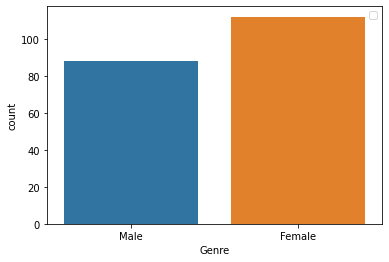

In [ ]:
sns.countplot(dataset['Genre'])
plt.legend()
plt.show()

There are approx 90 males and 120 females according to the dataset

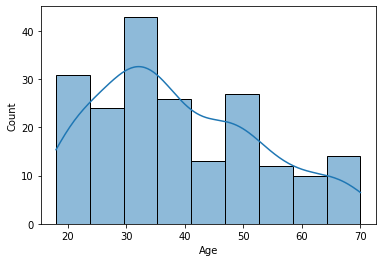

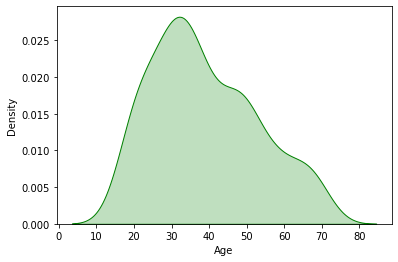

In [ ]:
plt.subplot()
sns.histplot(dataset['Age'], kde=True)
plt.show()
plt.subplot()
sns.kdeplot(dataset['Age'],shade=True, color='g')  
plt.show()

20-50 Age people averagely will spend for the purchase in the malls.

Especially on 30 to 35 age will people spend lot in the malls.

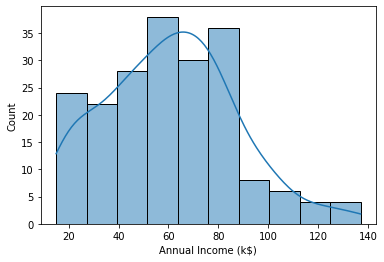

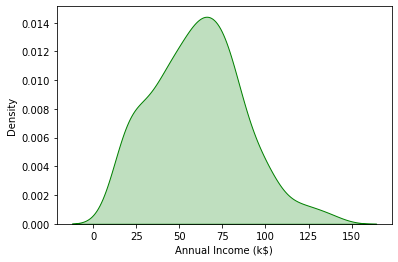

In [ ]:
plt.subplot()
sns.histplot(dataset['Annual Income (k$)'], kde=True)
plt.show()
plt.subplot()
sns.kdeplot(dataset['Annual Income (k$)'],shade=True, color='g')  
plt.show()

Averagely age 50-85 having annual income in the dataset

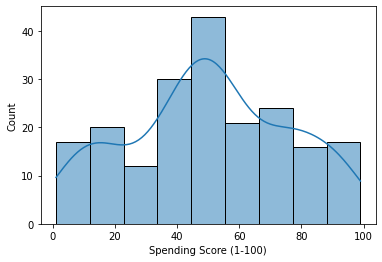

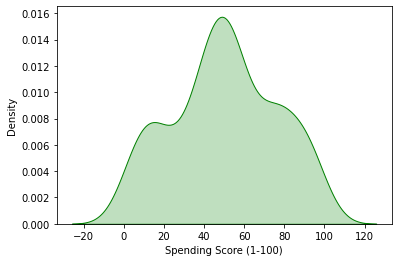

In [ ]:
plt.subplot()
sns.histplot(dataset['Spending Score (1-100)'], kde=True)
plt.show()
plt.subplot()
sns.kdeplot(dataset['Spending Score (1-100)'],shade=True, color='g')  
plt.show()

Having average of 35 to 65 spending score in the dataset.

In [ ]:
x = dataset.iloc[:,[3,4]].values # we have taken annual income and spending scores

Finding the optimal number of clusters [Elbow Method Graph]

In [ ]:
from sklearn.cluster import KMeans
wcss_list = []

In [ ]:
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++' , random_state = 42)
  kmeans.fit(x)
  wcss_list.append(kmeans.inertia_)

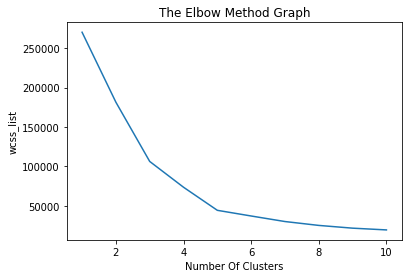

In [ ]:
plt.plot(range(1,11) , wcss_list)
plt.title("The Elbow Method Graph")
plt.xlabel("Number Of Clusters")
plt.ylabel("wcss_list")
plt.show()

From the Elbow Method, It is very clear that we need to have 5 clusters

Training The K Means Model On the Dataset

In [ ]:
kmeans = KMeans(n_clusters=i, init='k-means++' , random_state = 42)
y_predict = kmeans.fit_predict(x)

Visualing the Clusters

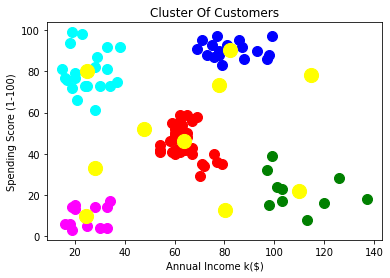

In [ ]:
plt.scatter(x[y_predict == 0,0] , x[y_predict == 0,1] , s=100, c = 'red', label = 'Cluster 1') 
plt.scatter(x[y_predict == 1,0] , x[y_predict == 1,1] , s=100, c = 'blue', label = 'Cluster 2') 
plt.scatter(x[y_predict == 2,0] , x[y_predict == 2,1] , s=100, c = 'green', label = 'Cluster 3')  
plt.scatter(x[y_predict == 3,0] , x[y_predict == 3,1] , s=100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_predict == 4,0] , x[y_predict == 4,1] , s=100, c = 'magenta', label = 'Cluster 5') 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s=200 , c = 'yellow')
plt.title("Cluster Of Customers")
plt.xlabel("Annual Income k($)")
plt.ylabel("Spending Score (1-100)")
plt.show()